<a href="https://colab.research.google.com/github/WladerRR/DataScience/blob/main/Analisando_os_Dados_do_Airbnb_(Ottawa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Ottawa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Ottawa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados para análise foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).  

Por ser um projeto de análise exploratória inicial, apenas o seguinte arquivo será baixado:
* `listings.csv` - 	Summary information and metrics for listings in Ottawa (good for visualisations).

In [5]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/ottawa/2020-12-20/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [29]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34220,Room available,147438,Mark,NaN,Capital,45.40924,-75.67900,Private room,202,7,0,NaN,NaN,1,0
1,36642,City Conveniences A Country Setting,157787,Donna,NaN,Kitchissippi,45.40159,-75.74679,Private room,65,3,87,2020-02-17,0.68,1,233
2,59258,Lower level of my house to rent,284351,Elena,NaN,Bay,45.35900,-75.80314,Entire home/apt,200,3,1,2011-07-04,0.01,1,0
3,158824,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,87296,Luc,NaN,Capital,45.40248,-75.69941,Entire home/apt,140,3,7,2015-08-30,0.06,1,0
4,261065,Westboro Village Executive Suite,1369632,Glenn,NaN,Kitchissippi,45.38972,-75.75496,Entire home/apt,150,3,64,2020-10-19,0.58,1,322


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`.


In [30]:
# identificar o volume de dados do DataFrame

print("Entradas: \t {}" .format(df.shape[0]))
print("Variáveis: \t {} \n" .format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)


Entradas: 	 2693
Variáveis: 	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [31]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.166729
last_review                       0.166729
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

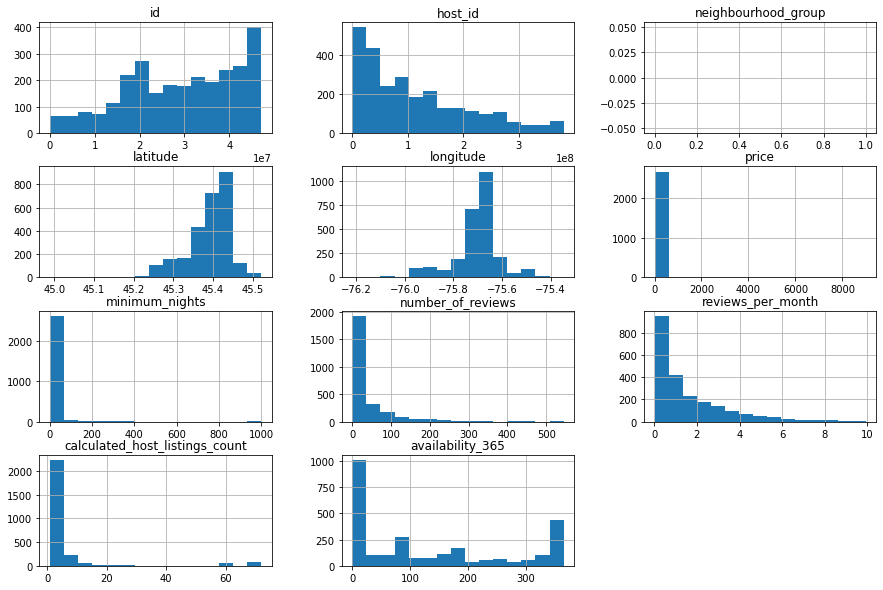

In [32]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15 , figsize= (15,10));

### **Identificando outliers e removendo-os**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [33]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2693.000000,2693.000000,2693.000000,2244.000000,2693.000000,2693.000000
mean,123.658745,10.633866,37.748608,1.588026,6.073153,130.526922
std,265.285121,47.211150,64.808017,1.773658,14.111536,135.947338
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,56.000000,1.000000,2.000000,0.310000,1.000000,0.000000
50%,85.000000,2.000000,11.000000,0.925000,2.000000,87.000000
75%,128.000000,5.000000,45.000000,2.252500,3.000000,254.000000
max,9000.000000,1000.000000,545.000000,9.930000,72.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de `C$ 128`, porém seu valor máximo é `C$ 9000`.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


#### Boxplot para price

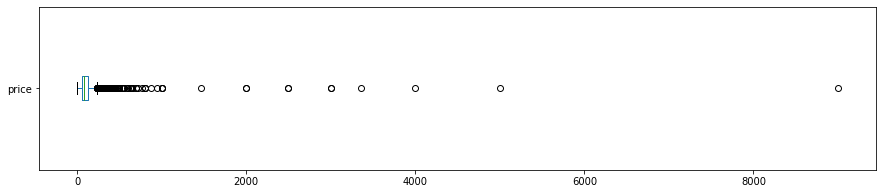

Valores acima de C$ 1500
Entradas: 37
1.3739%


In [34]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("Valores acima de C$ 1500")
print("Entradas: {}" .format(len(df[df.price > 500])))
print("{:.4f}%" .format((len(df[df.price > 500]) / df.shape[0])*100))

#### Boxplot para minimum_nights


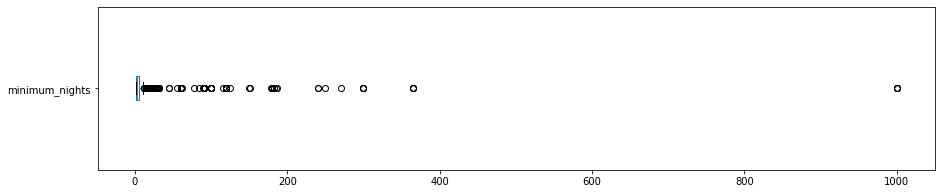

Valores acima de 30 dias
Entradas: 83
3.0821%


In [35]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("Valores acima de 30 dias")
print("Entradas: {}" .format(len(df[df.minimum_nights > 30])))
print("{:.4f}%" .format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

In [37]:
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 500].index , axis=0, inplace=True)

df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

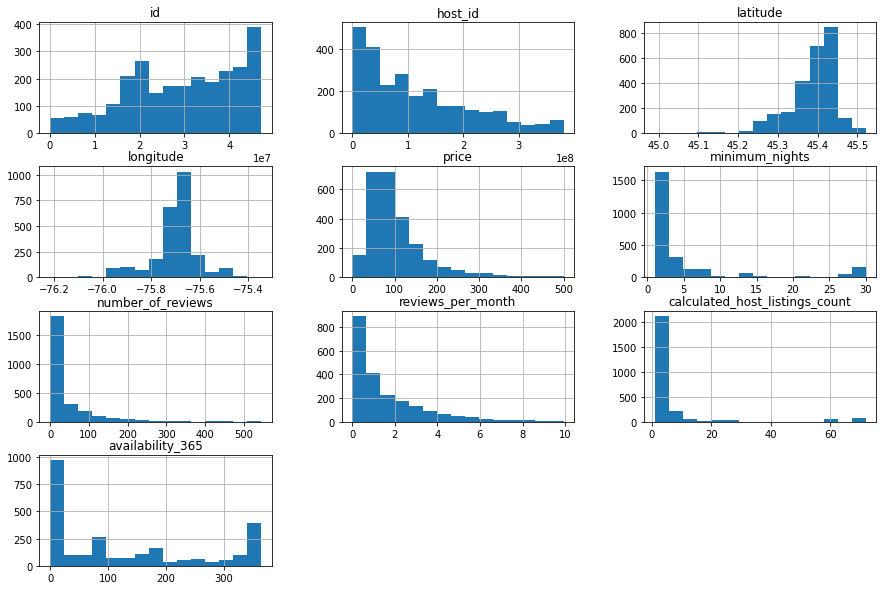

In [15]:
df_clean.hist(bins = 15 , figsize= (15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [38]:
# ver a média da coluna `price``

print("A média de preços é : C$ {:.4f}" .format(df_clean['price'].mean()))


A média de preços é : C$ 104.1381


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [27]:
# criar uma matriz de correlação

corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.036862,-0.042316,-0.044133,0.041998,0.041061
minimum_nights,0.036862,1.000000,-0.096876,-0.156767,0.238519,0.077019
number_of_reviews,-0.042316,-0.096876,1.000000,0.750815,-0.061315,0.042811
reviews_per_month,-0.044133,-0.156767,0.750815,1.000000,0.061517,0.140381
calculated_host_listings_count,0.041998,0.238519,-0.061315,0.061517,1.000000,0.013100
availability_365,0.041061,0.077019,0.042811,0.140381,0.013100,1.000000


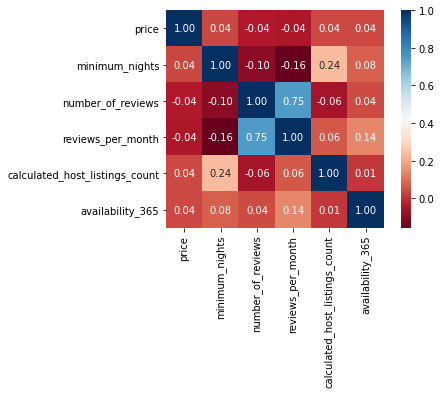

In [18]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    1530
Private room       1020
Shared room          22
Hotel room            6
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.593483
Private room       0.395656
Shared room        0.008534
Hotel room         0.002327
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Ottawa?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [21]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
West Carleton-March    163.326087
Kitchissippi           125.750000
Capital                119.210227
Rideau-Goulbourn       115.227273
Somerset               111.126027
Rideau-Vanier          107.386318
Bay                    102.607595
College                 99.886598
River                   99.685484
Alta Vista              98.676768
Name: price, dtype: float64

In [57]:
# ver quantidade de imóveis por bairros
df_clean.neighbourhood.value_counts().sort_values(ascending=True)[:10]

Osgoode                    24
Innes                      37
Rideau-Goulbourn           44
West Carleton-March        46
Stittsville-Kanata West    54
Barrhaven                  54
Kanata South               55
Orleans                    56
Beacon Hill-Cyrville       65
Cumberland                 65
Name: neighbourhood, dtype: int64

Acima, vemos que bairros como West Carleton-March, Kitchissippi  e Capital, estão com média de preço superior a de lugares como Rideau-Vanier e Somerset e Alta Vista.

Verificando a quantidade de imóveis por bairros, percebemos que embora West Carleton-March seja o bairro mais caro, possui menos imóveis para se alugar que Rideau-Vanier como exemplificado abaixo:





In [83]:
# ver quantidade de imóveis em West Carleton-March
print("Quantidade de imóveis em West Carleton-March: {}" .format(df_clean[df_clean.neighbourhood == "West Carleton-March"].shape[0]))

# ver quantidade de imóveis em Rideau-Vanier
print("Quantidade de imóveis em Rideau-Vanier: {}" .format(df_clean[df_clean.neighbourhood == "Rideau-Vanier"].shape[0]))

print("\n \t A quantidade de imóveis em Rideau-Vanier é {:.1f} vezes superior à em West Carleton-March" .format((df_clean[df_clean.neighbourhood == "Rideau-Vanier"].shape[0] / df_clean[df_clean.neighbourhood == "West Carleton-March"].shape[0])))


Quantidade de imóveis em West Carleton-March: 46
Quantidade de imóveis em Rideau-Vanier: 497

 	 A quantidade de imóveis em Rideau-Vanier é 10.8 vezes superior à em West Carleton-March


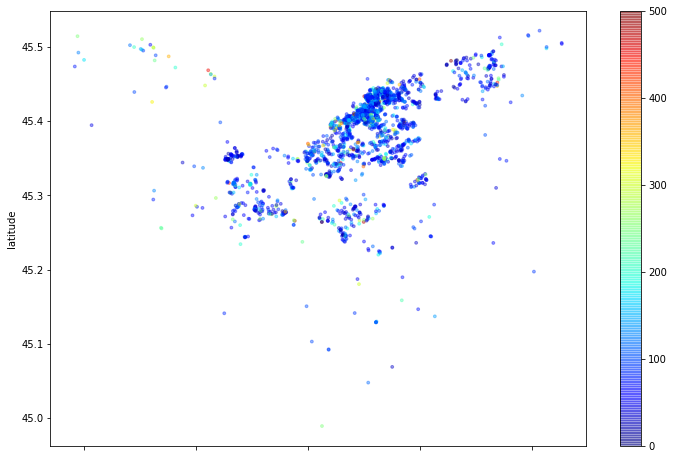

In [84]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [23]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.mean()


5.268037238169123

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também notou-se que alguns lugares possuem grande disparidade em quantidades de imóveis que outros.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Para se fazer uma análise exploratória aprofundada, deve-se utilizar o conjunto de dados completos para a cidade de Ottawa - 	[*Detailed Listings data for Ottawa* - `listings.csv.gz`](http://data.insideairbnb.com/canada/on/ottawa/2020-12-20/data/listings.csv.gz).